<a href="https://colab.research.google.com/github/MatchLab-Imperial/deep-learning-course/blob/master/01_part3_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Starting with Keras**

Keras is a high-level Deep Learning API  written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. In other words, Keras is especially good for beginners, it is modular, minimalist, and it makes everything easy to get a neural network up and running in no time.

The following code is based on [this tutorial](https://elitedatascience.com/keras-tutorial-deep-learning-in-python), and it is just a brief introduction to Keras. You can refer to [Keras documentation](https://keras.io/) to learn more details in the future about it.

## Importing Libraries and Modules

Google Colab already has everything you need installed. We highly recommend to use Colab for these tutorials, however, if you want to use your own environment, you will need to set up a Python ecosystem and install Keras on it.

You can find multiple guides that will help you with the task of installing Keras on your machine. Here are some examples for [Windows](http://inmachineswetrust.com/posts/deep-learning-setup/) or [Ubuntu](https://medium.com/@naomi.fridman/install-conda-tensorflow-gpu-and-keras-on-ubuntu-18-04-1b403e740e25).

Let's start with an easy example. First of all, we will import NumPy and define the seed for the pseudorandom number generator. Specifying the seed is a common practice because different initializations might lead to varying results.

In [1]:
import numpy as np
np.random.seed(1234)  # for reproducibility

Now we are ready to import some of the Keras' modules.

First, we will import the `Sequential` module from Keras. A `Sequential` module is a stack of neural network layers. We will need it for creating our first feed-forward neural network.

In [2]:
from keras.models import Sequential

As mentioned before, Keras is a wrapper that allows us to use either Theano or TensorFlow as a backend. It is easy to switch between them if required. However, newer versions of Keras will focus on the TensorFlow backend, dropping support for the rest of the backends. Thus, in this tutorial, we will use the TensorFlow backend. Similar to the NumPy pseudorandom number generator, we also fix Keras' pseudorandom number generator for reproducibility.

In [3]:
import tensorflow as tf
tf.random.set_seed(123)

Next, we import two of the core layers used to build a network on Keras: [`Dense`](https://keras.io/layers/core/#dense) and [`Activation`](https://keras.io/layers/core/#activation). In short, the `Dense` defines a fully-connected network where all the neurons are connected to all of the elements of the input data, and the `Activation` defines a non-linear function applied to the network. We will explain more about those layers in the following tutorials.

In [4]:
from keras.layers import Dense, Activation

In addition, we need to import some utils, that will help us later with the visualisation and transformation of the dataset.

In [5]:
from keras.utils import to_categorical
import matplotlib.pyplot as plt

## Loading Datasets from Keras

Besides the modules to build our neural networks, Keras library also contains a set of [standard datasets](https://keras.io/datasets/). The fact that those datasets are inside Keras is handy and can save us a lot of time when learning how to create our first neural network.

Therefore, let's import the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset. MNIST is a popular dataset on the computer vision community that contains a large number of binary images of handwritten digits. Once loaded, Keras allows us to easily split the dataset into the commonly used train and test data splits.

In [6]:
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Automatically, Keras has provided us with the `X_train` and `X_test` images for training and testing, respectively. Moreover, Keras also stores into `y_train` and `y_test` the corresponding numeric labels associated with `X_train` and `X_test`.

We can now look into the shape of the imported data and visualise some examples:

Image shape: (28, 28)
Total number of training samples: 60000
Total number of test samples: 10000


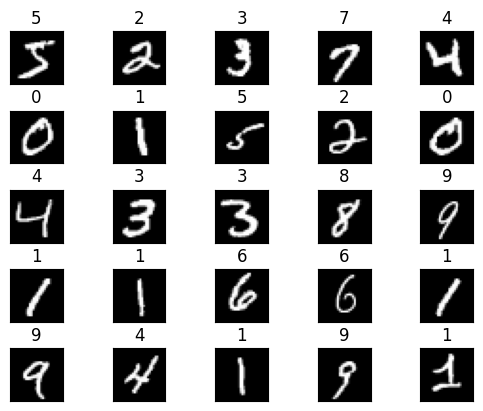

In [7]:
print('Image shape: {0}'.format(X_train.shape[1:]))
print('Total number of training samples: {0}'.format(X_train.shape[0]))
print('Total number of test samples: {0}'.format(X_test.shape[0]))

N=5
start_val = 0 # pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
items = list(range(0, 10))
for row in range(N):
  for col in range(N):
    idx = start_val+row+N*col
    axes[row,col].imshow(X_train[idx], cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    y_target = int(y_train[idx])
    target = str(items[y_target])
    axes[row,col].set_title(target)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])

We have 60000 training samples and 10000 test samples, where each image has a shape of 28×28 pixels. Visualising the data before deploying any algorithm is always a good idea: it is a quick sanity check that can prevent avoidable mistakes.

## Preprocessing Keras Datasets

In this first example, we train a simple model to classify the digits on MNIST dataset.

As will be studied in the lectures, convolutional layers are usually employed to classify images. However, for the time being, we use only `Dense` layers. Thus, we have to reshape the images into a 1D array to have a single dimension, and define an architecture that could be used in any 1D data, *e.g.*, time series. We will see on following weeks that when using Convolutional Neural Networks (CNNs) we must define a 3D shape for images (depth, width, height). CNNs usually have higher performance compared to models with only `Dense` layers when applied to 2D data.

Let's transform the 2D images into 1D arrays.

In [8]:
X_train_flatten = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print('New X_train shape: {0}'.format(X_train_flatten.shape))

New X_train shape: (60000, 784)


A standard practise is to normalise the dataset to the range $[0, 1]$.

In [9]:
X_train_flatten = X_train_flatten.astype('float32')
X_test_flatten = X_test_flatten.astype('float32')
X_train_flatten /= 255
X_test_flatten /= 255

We train a classifier in a supervised manner, and therefore, we need to process the labels so that our pipeline can use them. The `y_train` and `y_test` labels indicate the numerical values belonging to the `X_train` and `X_test` images.

We use a Categorical CrossEntropy as the loss function. To feed the loss function with the labels, we need to transform them into a [one-hot encoded vector](https://en.wikipedia.org/wiki/One-hot).

In [10]:
Y_train_class = to_categorical(y_train, 10)
Y_test_class = to_categorical(y_test, 10)

print('New Y_train shape: {0}'.format(Y_train_class.shape))

New Y_train shape: (60000, 10)


To see the difference between one-hot encoded and integer representation, let's print the first element of `y_train` and `Y_train_class`.

In [11]:
print('Label: {0}.    One-hot Vector: {1}'.format(y_train[0], Y_train_class[0]))

Label: 5.    One-hot Vector: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Model Architecture


Defining a model architecture is a critical step when trying to solve a machine learning problem. In this tutorial, we will understand how models can be built into Keras.

First, we need to declare a `Sequential` module. As mentioned, the `Sequential` module allows us to combine neural network layers linearly. We create a model by passing a list of layer instances to the `Sequential` module:

In [12]:
model = Sequential([
    Dense(10, input_shape=(784,)),
    Activation('softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The previous model is composed of a dense layer and activation function (Softmax). Another way of defining architectures is to simply add layers via the `.add()` method:

In [13]:
model = Sequential()
model.add(Dense(10, input_dim=784))
model.add(Activation('softmax'))

We now have a simple model ready to go!

Note that the model needs to know the shape of the input data. For this reason, the first layer in the Sequential model needs information about the input shape (the following layers can automatically infer the shape, and you do not need to specify it). In our case, we tell the network that the `input_shape` is 784. The 784 size vector comes from the flatten operation of our images (28 x 28). If we were using directly images, the input shape would have been (28, 28, 1), which corresponds to the (width, height, depth) of each digit image. The formatting (width, height, depth) is called `channels_last`, which is used by default in Keras. However, Keras also accepts the format (depth, width, height), that is called `channels_first` and it is commonly used in PyTorch. Keep in mind that you can change the formatting by passing the argument `data_format` when defining a layer.

Let's print the model shape output:

In [14]:
print(model.output_shape)

(None, 10)


We define the output of our layer to be 10, that corresponds to the 10 different classes in MNIST (one, two, three, ..., nine.). Keras automatically handles the connections between layers, so there is no need for us to manually set up anything within the architecture.

We see how our model looks like by using the `.summary()` method.

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In our example, the first row of the table has $784\cdot 10+ 10=7850$ parameters, where the first term refers to the connections between input data and neurons,  and the second term to the output bias.

## Compilation

Before training our model, we need to configure the learning process, which is done via the compile method. We must define three important parameters here:

*   The loss function that the model will try to minimise.
*   The optimiser used to minimise the loss function and update the weights of the network.
*   The list of metrics you want the model to compute in every step.

In our example, as we are doing classification, we will define the `categorical_crossentropy` as the loss function, and we will compute the accuracy metric. You can refer to Keras documentation to learn more about [losses](https://keras.io/losses/) or [optimisers](https://keras.io/optimizers/). Many other parameters could be tuned, e.g., learning rate, decay factor, or weight normalisation. We will explore in more detail all of these parameters in the following tutorials. For now, we will use the default values for them.




In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

To train the model, we call `.fit()` after compiling the model. We have to define the batch size and the number of total epochs the model is going to train. We are finally ready to start the learning of our classifier!

In [17]:
history = model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8190 - loss: 0.7082
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9136 - loss: 0.3100
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9199 - loss: 0.2849
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9239 - loss: 0.2735
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9264 - loss: 0.2664
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9276 - loss: 0.2615
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9290 - loss: 0.2577
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9295 - loss: 0.2548
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9304 - loss: 0.2523
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9310 - loss: 0.2502


Great, we have trained our first model!

Imagine that we need to train the model until it converges, and we do not know how many epochs it will take. Then, we can define some mechanism to control the learning curves and stop them whenever we see fit. Those mechanisms are called callbacks in Keras. Thus, callbacks allow us to define early-stopping rules. Additionally, we use [callbacks methods](https://keras.io/callbacks/) to save the model's weights or log history along the training process, among many other things. An example of using the early stopping callback is given later in this tutorial.

Most of the times, the training curves give important information about the training process. To visualise them, we can use the information saved on the training history:

Text(0.5, 0, 'Epoch')

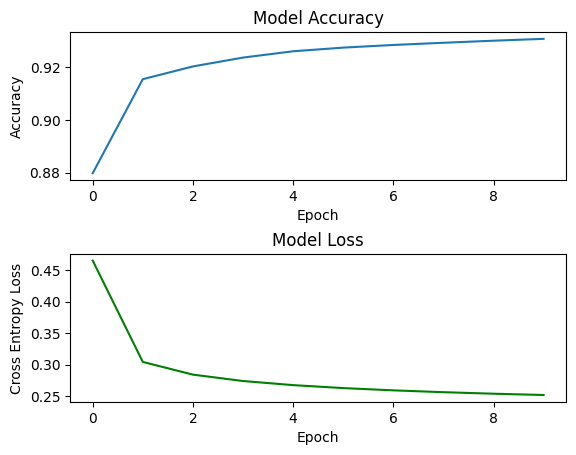

In [18]:
fig, axes = plt.subplots(2,1)
axes[0].plot(history.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')

fig.subplots_adjust(hspace=0.5)

axes[1].plot(history.history['loss'], 'g')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Cross Entropy Loss')
axes[1].set_xlabel('Epoch')

## Evaluating Model

Finally, we check the metrics of our model on the test data by using the method `.evaluate()`:

In [19]:
score = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2644534111022949
Test accuracy: 0.9284999966621399


# Training a Simple Multi-layer Perceptron

Earlier, we showed how to create a simple network that maps directly from $784$ (input size) to $10$ (output size). In the following sections, we explain the basics of creating more complex models, models that combine different sequential layers to perform more accurate classifications.

Hence, we start by defining a network with an extra layer and study how that affects the final test accuracy.

In [20]:
model2 = Sequential()
model2.add(Dense(100, activation='relu', input_shape=(784,)))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

We have increased the number of parameters from 7850 to 79510 by adding this layer. Remember that the number of units given to the last layer in Keras defines the dimensionality of the output space, thus, we need the last layer to have the same size that the total number of classes to classify.

Note that we use ReLU (Rectified Linear Unit) activation function after the first dense layer. ReLU is a common activation function, we will give more details about it in future tutorials. However, for now, you can learn more about ReLU [here](https://keras.io/activations/#relu).

We train our new model and visualise the model curves:

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8754 - loss: 0.4520
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9597 - loss: 0.1375
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9732 - loss: 0.0906
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9812 - loss: 0.0668
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0522
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9885 - loss: 0.0408
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9916 - loss: 0.0320
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9937 - loss: 0.0249
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9951 - loss: 0.0196
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9961 - loss: 0.0159


Text(0.5, 0, 'Epoch')

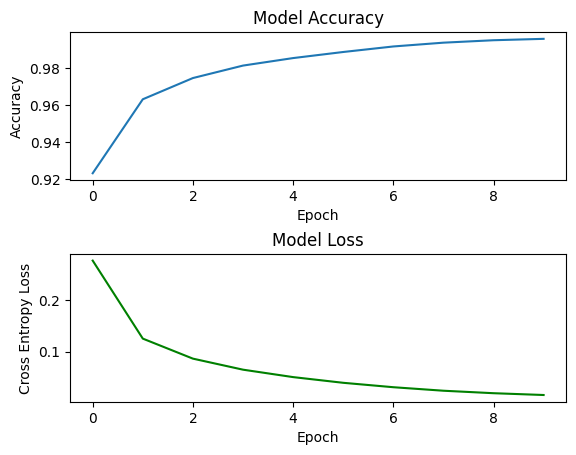

In [21]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=10)

fig, axes = plt.subplots(2,1)
axes[0].plot(history2.history['accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')

fig.subplots_adjust(hspace=0.5)

axes[1].plot(history2.history['loss'], 'g')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Cross Entropy Loss')
axes[1].set_xlabel('Epoch')

We have now trained two different models. Let's plot their metrics to see how that extra layer affected the results in the network performance.

In [22]:
print('Old model:')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print('New model:')
score2 = model2.evaluate(X_test_flatten, Y_test_class, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Old model:
Test loss: 0.2644534111022949
Test accuracy: 0.9284999966621399
New model:
Test loss: 0.08987264335155487
Test accuracy: 0.9772999882698059


We have improved accuracy results on the test set. Even though there is still margin for parameter tuning, the reached accuracy is already pretty high. We could add more layers or change the number of neurons in each layer to see if we could boost even further the results.

Let's now explore some techniques that will prove useful in the following tutorials.

## Saving/Loading Model

Some networks require long training times (hours, days or even weeks), hence, it is essential to know how to save the models for using them in future times without the need of retraining them every time.

We can save and load the trained model in different ways.

The first way is to save everything into a single HDF5 file, which will contain:

*   the architecture of the model, allowing to re-create the model
*   the weights of the model
*   the training configuration (loss, optimiser)
*   the state of the optimiser, which permits us to resume training exactly where you left it off.


In [23]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# Load a compiled model identical to the previous one
model = load_model('my_model.h5')

An alternative method is to save the architecture and the weights independently.




In [24]:
model.save_weights('my_model.weights.h5') # creates a HDF5 file 'my_model_weights.h5'

with open('my_model_architecture.json', 'w') as f:
    f.write(model.to_json()) # creates a json file 'my_model_architecture.json'

If we want to load the model, without having to define it, we can use the `model_from_json()`.

In [25]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('my_model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

Once we have a model defined, we can load the weights with the method `load_weights(file_path)`.

In [26]:
model.load_weights('my_model.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Additionally, you can refer to [Keras' documentation](https://keras.io/getting_started/faq/#how-can-i-regularly-save-keras-models-during-training) and check how to create a callback which saves our model every 100 steps.

### Download Models / Save to Google Drive
One of the problems you may face is that the models, or any other file, saved in Colab will not be there permanently. In some cases, you will want to store your model weights in a more lasting way. There are two ways to save your model. First, you can download any file to your computer. To do so, you can use the left-side menu in Colab, and follow the instructions on the image below.

![Screenshot](https://i.ibb.co/yS5JgPd/Screenshot-2021-01-18-at-15-46-04.png)

If you want to use any file you previously downloaded, you will need to manually upload your file using the Colab interface.



Another way to save your weights is by using your Google Drive storage. This can be more convenient, as you can quickly load the models again from your Drive without having to upload manually the file. To do so, you can click on the folder with the Drive symbol highlighted in the following image.

![Screenshot](https://i.ibb.co/PFGw6QR/Screenshot-2021-01-18-at-16-16-44.png)

After clicking on the Drive folder, the code below will appear in your Colab notebook. You need to run it and follow the instructions to have access to your Google Drive folder.

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After the `drive` folder is mounted, you will see a new folder on your files section in Colab as in the following image.

![Screenshot](https://i.ibb.co/NSM1RFK/Screenshot-2021-01-18-at-16-17-48.png)

Now, you can save the model to your personal Google Drive and also load any model from it.

In [28]:
model.save_weights('/content/drive/MyDrive/my_model.weights.h5')
model.load_weights('/content/drive/MyDrive/my_model.weights.h5')

Using your Google Drive storage is quite convenient. However, keep in mind that any file saved in your drive will also count towards your Google Drive storage limit.

## Obtaining an Output of an Intermediate Layer

Sometimes we need to check how features of intermediate layers look like. This can be used for extracting features, but also for debugging purposes. That is why we need to see how we can obtain information about any layer within the architecture.

The easiest way is to design a new model that will have as final output our desired layer. We first define the model:

In [29]:
from keras.models import Model
from keras.layers import Input, Dense

inputs = Input(shape=(784,), name='input_layer')
first_dense = Dense(64, activation='relu', name='first_dense')(inputs)
second_dense = Dense(128, activation='relu', name='second_dense')(first_dense)
final_dense = Dense(10, activation='softmax', name='final_dense')(second_dense)
model = Model(inputs=inputs, outputs=final_dense)
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_dense (Dense)                  │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_dense (Dense)                 │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ final_dense (Dense)                  │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

Now, we specify the name of the layer in which we are interested in obtaining the output. In our example, it is the second dense layer ("second_dense").

In [30]:
from keras.models import Model

layer_name = 'second_dense'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_test_flatten)
final_output = model.predict(X_test_flatten)

print('Second dense layer output shape: {0}'.format(intermediate_output.shape))
print('Final output shape: {0}'.format(final_output.shape))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Second dense layer output shape: (10000, 128)
Final output shape: (10000, 10)


## A bit more about Callback Functions

We have already talked a bit about callback functions and how to use them. You can check the complete list of available callbacks [in the documentation](https://keras.io/callbacks/).

Controlling and managing callbacks is essential when training big models. Sometimes we want to train the network until convergence. However, we are not able to determine the number of epochs it will take. Keras provides a handy method for controlling the training loops, the `EarlyStopping` callback. This callback checks when the network is not "learning" anymore and allows us to stop the training at any time.

Let's see an example of how to stop the training when the validation loss is not decreasing anymore:

In [31]:
from keras.callbacks import EarlyStopping

# Define the metric that will determine the earlyStopping.
# 'patience' defines the number of epochs we wait before stopping training
# when the monitored metric does not improve
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train_flatten, Y_train_class, validation_split=0.2,
            epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8480 - loss: 0.5141 - val_accuracy: 0.9537 - val_loss: 0.1558
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9563 - loss: 0.1456 - val_accuracy: 0.9628 - val_loss: 0.1224
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9711 - loss: 0.0987 - val_accuracy: 0.9657 - val_loss: 0.1134
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9782 - loss: 0.0734 - val_accuracy: 0.9694 - val_loss: 0.1040
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9846 - loss: 0.0540 - val_accuracy: 0.9694 - val_loss: 0.1061
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9869 - loss: 0.0435 - val_accuracy: 0.9709 - val_loss: 0.1082


The model stops training without reaching the 100 epochs. How convenient, right?

We could also combine multiple callbacks when calling the fit module, learn more about it [here](https://keras.io/callbacks/).

## Freezing Keras Layers

Keras also allows us to freeze some of the weights of specific layers. Freezing layers means that we can exclude them from training. A typical example where this proved useful is when fine-tuning a model. Remember that when fine-tuning a model, some layers are fixed, and normally only the last ones are trained to finetune the task-specific layers (e.g. classifiers) to the new task.

To freeze layers we can set the trainable argument (Boolean) of the layer to be non-trainable or trainable:

In [32]:
frozen_layer = Dense(32, trainable=False)

Additionally, we can access the layer arguments after initialisation. Therefore, we can set the trainable argument to `True` or `False` at any time. However, for this to take effect, we must call the `compile()` method after modifying any properties of the model:

In [33]:
from keras.models import clone_model

model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# We clone model in frozen_model
frozen_model = clone_model(model)
frozen_model.layers[0].trainable = False

# with this model the weights of the layer will be updated during training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# in the model below, the weights of `layer` will not be updated during training
frozen_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
frozen_model.summary()

score_untrained = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
score_frozen_untrained = frozen_model.evaluate(X_test_flatten, Y_test_class, verbose=0)

print('\nTrain Model:')
model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=5)

print('\nTrain Frozen Model:')
frozen_model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=5)

score = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
score_frozen = frozen_model.evaluate(X_test_flatten, Y_test_class, verbose=0)

print('\nBefore Training: Trainable Model Test Accuracy:', score_untrained[1])
print('After Training:  Trainable Model Test Accuracy:', score[1])

print('\nBefore Training: Frozen Model Test Accuracy:', score_frozen_untrained[1])
print('After Training:  Frozen Model Test Accuracy:', score_frozen[1])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,850 (30.66 KB)


Train Model:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8161 - loss: 0.7139
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9140 - loss: 0.3102
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9202 - loss: 0.2851
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9235 - loss: 0.2736
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9256 - loss: 0.2665

Train Frozen Model:
Epoch 1/5
  93/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0764 - loss: 2.4031

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0786 - loss: 2.4025
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0786 - loss: 2.4025
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0786 - loss: 2.4025
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0786 - loss: 2.4025
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0786 - loss: 2.4025

Before Training: Trainable Model Test Accuracy: 0.06970000267028809
After Training:  Trainable Model Test Accuracy: 0.9269999861717224

Before Training: Frozen Model Test Accuracy: 0.08060000091791153
After Training:  Frozen Model Test Accuracy: 0.08060000091791153


We see in the model description that the frozen model has 0 trainable parameters, while it has 7,850 non-trainable parameters. This fact indicates that we successfully froze that model and the training does not affect it. We can verify this using the results after training both networks, where the trainable model improves accuracy while the frozen one does not change at all.